In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import tensorflow as tf
import csv
from tensorflow.python.client import timeline

import nltk
from nltk.wsd import lesk
from nltk.corpus import wordnet as wn
from collections import Counter
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
import numpy as np
import scipy.stats.stats as st
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.wsd import lesk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
#from stemming.porter2 import stem
from nltk import PorterStemmer
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
from string import digits
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Configuration Data

## Pathes

### Data Source

In [364]:
#path_data_source='/home/fsg/output_csv/'
path_data_source='/media/fsg/74C86089C8604C04/PHD/Softwares/ph/data_source/'
sub_path_data_source='/media/fsg/74C86089C8604C04/PHD/Softwares/ph/data_source/files/'

#path_data_source='./data/'

### Table Database

In [365]:

#path_database='./data/database/'
#path_database='/home/fsg/output_csv/database/'
path_database='/media/fsg/74C86089C8604C04/PHD/Softwares/ph/database/' 

### XML DataBase

In [366]:
path_XML_database='/media/fsg/74C86089C8604C04/PHD/Softwares/ph/database/XML/' 
path_freq_word_files=path_XML_database+"freq/word/"
path_freq_lesk_files=path_XML_database+"freq/lesk/"

## Data Source

In [367]:
data_source = 'cs.txt'


## Tables

#### Table Data Base

In [368]:
paragraph_table='paragraph_table.csv' 
paragraph_header_list=['uuid','paragraph','doc_id']

In [369]:
sentences_paragraph_table='sentences_paragraph_table.csv' 
sentences_paragraph_list=['uuid','uuid_paragraph','sentence']

In [370]:
word_sentences_table='word_sentences_table.csv' 
word_sentences_list=['uuid','uuid_paragraph','uuid_sentence','remaining_word','lesk','lesk_name','definition']

word_paragraph='word_paragraph.csv'
word_paragraph_list=['index','list of word','No. of paragraph']

lesk_paragraph='lesk_paragraph.csv'
lesk_paragraph_list=['index','list of lesk','No. of paragraph']

In [371]:
freq_word_table='freq_word_table.csv'
#freq_table_list=['uuid','uuid_paragraph','word','word_freq','lesk_name','lesk_Freq']
freq_lesk_table='freq_lesk_table.csv'

In [372]:
tf_idf_word_table='tf_idf_word_table.csv'
tf_idf_lesk_table='tf_idf_lesk_table.csv'
tf_idf_table='tf_idf_table.csv'
nmf_H_table='nmf_H_table.csv'
nmf_W_table='nmf_W_table.csv'

In [373]:
res_sem_sim_table='res_sem_sim_table.csv' #H



In [374]:
inv_res_sem_sim_table='inv_res_sem_sim_table.csv'
inv_res_sem_sim_threshold_correlation_coefficient_table='inv_res_sem_sim_threshold_correlation_coefficient_table.csv' #H
inv_res_sem_sim_permutaion_correlation_coefficient_table='inv_res_sem_sim_permutaion_correlation_coefficient_table.csv'

In [375]:
nmf_H_res_normal_table='nmf_H_res_normal_table.csv'
nmf_W_res_normal_table='nmf_W_res_normal_table.csv'

nmf_H_tfidf_word_normal_table='nmf_H_tfidf_word_normal_table.csv'
nmf_W_tfidf_word_normal_table='nmf_W_tfidf_word_normal_table.csv'

nmf_H_tfidf_lesk_normal_table='nmf_H_tfidf_lesk_normal_table.csv'
nmf_W_tfidf_lesk_normal_table='nmf_W_tfidf_lesk_normal_table.csv'

In [376]:
res_sem_sim_threshold_correlation_coefficient_table='res_sem_sim_threshold_correlation_coefficient_table.csv' #H
res_sem_sim_permutaion_correlation_coefficient_table='res_sem_sim_permutaion_correlation_coefficient_table.csv' #H
nmf_W_res_sem_sim_permutaion_correlation_coefficient_table='nmf_W_res_sem_sim_permutaion_correlation_coefficient_table.csv'
nmf_W_res_sem_sim_correlation_coefficient_table='nmf_W_res_sem_sim_correlation_coefficient_table.csv'
nmf_W_res_sem_sim_threshold_correlation_coefficient_table='nmf_W_res_sem_sim_threshold_correlation_coefficient_table.csv'

### XML Data Base

#### Reports

##### General Reports

In [377]:
res_counter_columns_not_equal_zero_table='res_counter_columns_not_equal_zero_table.csv'
res_counter_columns_equal_zero_table='res_counter_columns_equal_zero_table.csv'
res_counter_columns_less_than_one_table='res_counter_columns_less_than_one_table.csv'
res_thresholding_counter_columns_not_equal_zero_table='res_thresholding_counter_columns_not_equal_zero_table.csv'
res_permutaion_counter_columns_not_equal_zero_table='res_permutaion_counter_columns_not_equal_zero_table.csv'



In [378]:
H_tfidf_lesk_normal_counter_not_equal_zero_table='H_tfidf_lesk_normal_counter_not_equal_zero_table.csv'
W_tfidf_lesk_normal_counter_not_equal_zero_table='W_tfidf_lesk_normal_counter_not_equal_zero_table.csv'

H_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table='H_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table.csv'
W_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table='W_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table.csv'

H_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table='H_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table.csv'
nmf_W_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table='nmf_W_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table.csv'

H_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table='H_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table.csv'
nmf_W_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table='nmf_W_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table.csv'

##### Dimentionalty Reduction

In [379]:
dimentionalty_reduction_res_statistical_table='dimentionalty_reduction_res_statistical_table.csv'
dimentionalty_reduction_res_thresholding_table ='dimentionalty_reduction_res_thresholding_table.csv'
dimentionalty_reduction_res_sem_sim_permutaion_table='dimentionalty_reduction_res_sem_sim_permutaion_table.csv'
dimentionalty_reduction_res_sem_sim_H_table='dimentionalty_reduction_res_sem_sim_H_table.csv'
dimentionalty_reduction_res_sem_sim_W_table='dimentionalty_reduction_res_sem_sim_W_table.csv'


### Combining Tables

In [380]:
Combining_H_table='Combining_H_table.csv'
Combining_H_fig='Combining_H_fig.png'
Combining_W_table='Combining_W_table.csv'
Combining_W_fig='Combining_W_fig.png'

### Sub Tables

In [381]:
TF_IDF_topic_table='TF_IDF_topic_table.csv'
Freq_topic_table='Freq_topic_table.csv'

# Configuration session

In [382]:
config = tf.ConfigProto(device_count={"CPU": 7},
                        allow_soft_placement=True,
                        inter_op_parallelism_threads=1,
                        intra_op_parallelism_threads=1,
                        use_per_session_threads=True)


'''config = tf.ConfigProto(device_count={"GPU": 4,"CPU":32},
                        allow_soft_placement=True,
                        inter_op_parallelism_threads=1,
                        intra_op_parallelism_threads=1,
                        use_per_session_threads=True)'''

'config = tf.ConfigProto(device_count={"GPU": 4,"CPU":32},\n                        allow_soft_placement=True,\n                        inter_op_parallelism_threads=1,\n                        intra_op_parallelism_threads=1,\n                        use_per_session_threads=True)'

# Generic function

## Write data to csv

In [383]:
'''
Write Excell sheet
'''
def save_file_to_database(data_rows,path_database,file_databbase,header_list):
    outfile = open(path_database+file_databbase,'w')
    writer=csv.writer(outfile)
    #header_list=['uuid','paragraph','doc_id']
    i=0
    for line in data_rows:
        row=[i,line,'paragraph no.'+str(i)]
        if i==0:
            
            writer.writerow(header_list)
            writer.writerow(row)
        else:
            #print('ff')
            writer.writerow(row)
        i+= 1
        #outfile.close()
            

## Read data from csv

In [384]:
'''
Read Excell sheet
'''
def read_text_from_database(path_database,file_databbase):
    queue_paragraph=[]
    #f = open(sys.argv[1], 'rt')
    outfile = open(path_database+file_databbase,'rt')
    try:
                
        reader=csv.reader(outfile)
        for row in reader:
            queue_paragraph.append(row)
            #print (row)
    finally:
        print ("row")
        outfile.close()
        
    return queue_paragraph
    

In [385]:
def read_cvs_by_pands(path_database,file_databbase,index_col, header):
    return pd.read_csv(path_database+file_databbase,index_col=index_col,header=header)

#read_cvs_by_pands(path_database,paragraph_table,index_col=0,header=0)

In [386]:
def write_cvs_by_pands(path_database,file_databbase,header,data_rows):
    csv_df=pd.DataFrame(data_rows,columns=header ) 
    csv_df.to_csv(path_database+file_databbase)

    

#write_cvs_by_pands(path_database,sentences_paragraph_table,sentences_paragraph_list,sales)

In [387]:
#save pragraphs to files
def write_file(pragraph,num_pragraph,path):
    file = open(path+str(num_pragraph)+".txt","w") 
 
    file.write(pragraph) 
    
    file.close() 
    

In [388]:
#create sub dataset
def sub_dataset(path_data_source,data_source):
    pragraphs=txt_pragraphs(read_file(path_data_source+data_source))
    counter=0
    for pragraph in pragraphs:
        print('pragraph no ',counter)
        write_file(pragraph,counter,sub_path_data_source)
        counter +=1
    

In [389]:
sub_dataset(path_data_source,data_source)

pragraph no  0
pragraph no  1
pragraph no  2
pragraph no  3
pragraph no  4
pragraph no  5
pragraph no  6


In [390]:
#https://stackoverflow.com/questions/36021526/converting-an-array-dict-to-xml-in-python


def dic_to_xml(dic,custom_root,path_freq_word_files,name_file):
    from dicttoxml import dicttoxml
    xml = dicttoxml(dic, custom_root=custom_root, attr_type=False)
    print(xml)

    file = open(path_freq_word_files+name_file+".xml","wb") 
 
    file.write(xml)
    
    file.close() 

    
dictionary = {
    'time': {"hourss":"1", "minute":"30","seconds": "40"},
    'place': {"street":"40 something", "zip": "00000"}
}    

dictionary2 = {
    "hourss":"1", "minute":"30","seconds": "40"}

dic_to_xml(dictionary2,'words',path_freq_word_files,'name_file')

b'<?xml version="1.0" encoding="UTF-8" ?><words><hourss>1</hourss><seconds>40</seconds><minute>30</minute></words>'


# Pre processing pipeline

## Read Huge File

In [391]:
def read_file(str):
    file = open(str,'r')
    txt=file.read()
    #print(txt)
    return txt

In [392]:
def read_bz():
    #https://codeyarns.com/2013/06/03/how-to-read-a-text-file-compressed-using-bzip2-in-python/
    import bz2
    bz_file = bz2.BZ2File("/media/fsg/74C86089C8604C04/PHD/Dataset/wiki.bz2")
    line_list = bz_file.readlines()



## Split Document to pragraphs

In [393]:
def txt_pragraphs(str):
    pragraphs = str.split("\n\n")
    return pragraphs
#pragraphs=txt_pragraphs(txt)
#type(pragraphs)

# Queue Files

In [394]:
import tensorflow as tf
sess = tf.Session()

# Make a queue of file names including all the txt files in the relative
# txt directory.
filename_queue = tf.train.string_input_producer(tf.train.match_filenames_once(sub_path_data_source+"*.txt"))
print(type(tf.train.match_filenames_once(sub_path_data_source+"*.txt")))

# Read an entire txt file which is required since they're txts

txt_reader = tf.WholeFileReader()


# Read a whole file from the queue, the first returned value in the tuple is the
# filename which we are ignoring.
txt_name, txt_file = txt_reader.read(filename_queue)



tf.global_variables_initializer().run(session=sess)
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, sess=sess)
for iteration in range(0, 7):
    name = sess.run([txt_name])
    content = sess.run([txt_file])
    print('name:',name,'\n')
    print('content:',content,'\n','========================','\n')
coord.request_stop()
coord.join(threads)

<class 'tensorflow.python.ops.variables.Variable'>
name: [b'/media/fsg/74C86089C8604C04/PHD/Softwares/ph/data_source/files/4.txt'] 

content: [b'From Mississippi State University,Computer Science is the study of principles, applications, and technologies of computing and computers. It involves the study of data and data structures and the algorithms to process these structures; of principles of computer architecture-both hardware and software; of problem-solving and design methodologies; of computer-related topics such as numerical analysis, operations research, and artificial intelligence; and of language design, structure, and translation technique. Computer Science provides a foundation of knowledge for students with career objectives in a wide range of computing and computer-related professions.'] 

name: [b'/media/fsg/74C86089C8604C04/PHD/Softwares/ph/data_source/files/6.txt'] 

content: [b'Computer Science: The Profession Computer science is a discipline that involves the underst

## Save paragraphs in excel 

In [395]:
save_file_to_database(txt_pragraphs(read_file(path_data_source+data_source)),path_database,paragraph_table,paragraph_header_list)

## Split Paragraph to Sentences

In [396]:
def pragraph_to_setnences(str):
    return sent_tokenize(str)
#setnences=pragraph_to_setnences(pragraphs[n_pragraph])

## Word Process For Sentence

### Removing English stopwords and Punct per Sentence

In [397]:
new_stop_words = ['the', 'that', 'to', 'as', 'there', 'has', 'and', 'or', 'is', 'not', 'a', 'of', 'but', 'in', 'by', 'on', 'are', 'it', 'if','what','where','how','when']
new_stop_words2=['--','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now','even','until','then','must']
numbers=[1,2,3,4,5,6,7,8,9]
#stemmer = SnowballStemmer("english", ignore_stopwords=True)
def remove_stopword_sentences(str):
    tokenizer = RegexpTokenizer("[\w']+")
    
    words=tokenizer.tokenize(str)
    
    english_stops = set(stopwords.words('english'))
    stems=[]
    list_word=[word for word in words if word.lower() not in english_stops and word.lower() not in new_stop_words and word.lower() not in new_stop_words2 and  not word.lower().isdigit() and word.lower() not in digits and word.lower() not in  numbers]
    
    for word in list_word:
        #stems.append(stem(word))
        #stems.append(PorterStemmer().stem(word))
        #stems.append(stemmer.stem(word))
        #stems.append(stemmer.stem("computer"))
        stems.append(word)
    
    return stems#(stem(setem_word for setem_word in  ([word for word in words if word not in english_stops and word not in new_stop_words])))

In [398]:
paragraph_list=read_text_from_database(path_database,paragraph_table)

row


In [399]:
def word_list_sentece(pragraph):
    words_list=[]
    setnences=pragraph_to_setnences(pragraph)
    for indexs in range(len(setnences)):    
        #print("Sentence No. ",indexs,": ",setnences[indexs],"\n")
        words=remove_stopword_sentences(setnences[indexs])
        wordsent=''
        for index in range(len(words)):
            wordsent+=' '+words[index]
            #print("wordsent:",wordsent)
            
        words_list.append(wordsent)
        #count = Counter(words)
        #print("wordsent:",wordsent)
        #print(" word:",words)
    print(words_list)
    return words_list

#corpus=word_list_sentece(pragraphs[0])

## Word Sense Disambiguation (WSD): LESK per Sentence

Given an ambiguous word and the context in which the word occurs, Lesk returns a Synset with the highest number of overlapping words between the context sentence and different definitions from each Synset.


In [400]:

'''
this function for compute lesk for each word(list of word) in sentence
'''
def lesk_words_sentence(words,sentence):
    lesks= []
    for word in words:
        if lesk(sentence,word, 'n') is not None:
            lesks.append(lesk(sentence,word, 'n'))
            #print("Word is: ",word,"\n LESK: ",lesk(sentence,word, 'n'),"\n Sentence: ",sentence )
        
    return lesks

In [401]:
'''
this function for compute lesk of word in sentence
'''

def lesk_word_sentence(sentence,word):
    from nltk.wsd import lesk
    lesk_synset=''
    #lesks= []
    #for word in words:
    #disambiguated=lesk(context_sentence=sentence, ambiguous_word=word)
    disambiguated=lesk(sentence,word, 'n')
    #print(disambiguated)
    #if disambiguated is not None:
    lesk_synset=disambiguated
    #else:
    #lesk_synset=0
    #print("Word is: ",word,"\n LESK: ",lesk(sentence,word, 'n'),"\n Sentence: ",sentence )
        
    return lesk_synset

#lesk("Computer science is a discipline that spans theory and practice","science")

#sent = 'people should be able to marry a person of their choice'.split()
#lesk(sent, 'able')

## Calculating WordNet Synset similarity using information content

In [402]:
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wnic
from nltk.tokenize import word_tokenize

def similarity_by_infocontent(sense1, sense2, option):
    #sense1="Synset('"+sense1+"')"
    #sense2="Synset('"+sense2+"')"
    sense1 = wn.synset(sense1)
    sense2 = wn.synset(sense2)
    print(sense1,sense2)
    """ Returns similarity scores by information content. """
    #if sense1.pos != sense2.pos: # infocontent sim can't do diff POS.
        #return 0

    info_contents = ['ic-bnc-add1.dat', 'ic-bnc-resnik-add1.dat', 
                     'ic-bnc-resnik.dat', 'ic-bnc.dat', 

                     'ic-brown-add1.dat', 'ic-brown-resnik-add1.dat', 
                     'ic-brown-resnik.dat', 'ic-brown.dat', 

                     'ic-semcor-add1.dat', 'ic-semcor.dat',

                     'ic-semcorraw-add1.dat', 'ic-semcorraw-resnik-add1.dat', 
                     'ic-semcorraw-resnik.dat', 'ic-semcorraw.dat', 

                     'ic-shaks-add1.dat', 'ic-shaks-resnik.dat', 
                     'ic-shaks-resnink-add1.dat', 'ic-shaks.dat', 

                     'ic-treebank-add1.dat', 'ic-treebank-resnik-add1.dat', 
                     'ic-treebank-resnik.dat', 'ic-treebank.dat']

    if option in ['res', 'resnik']:
        #return wn.res_similarity(sense1, sense2, wnic.ic('ic-bnc-resnik-add1.dat'))
        #print('simRe snik (c1,c2) = -log p(lso(c1,c2)) = IC(lso(c1,c2)')
        return wn.res_similarity(sense1, sense2, wnic.ic('ic-treebank-resnik-add1.dat'))
    #return min(wn.res_similarity(sense1, sense2, wnic.ic(ic)) \
    #             for ic in info_contents)

    elif option in ['jcn', "jiang-conrath"]:
        #return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(jcn) (c1,c2 )= (IC(c1) + IC(c2 )) - 2IC(lso(c1,c2 ))')
        return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

    elif option in ['lin']:
        #return wn.lin_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(lin) (c1,c2)=(2IC(lso(c1,c2 )))/(IC(c1)+IC(c2))')
        return wn.lin_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

def sim(sense1, sense2, option="path"):
    """ Calculates similarity based on user's choice. """
    option = option.lower()
    if option.lower() in ["path", "path_similarity", 
                        "wup", "wupa", "wu-palmer", "wu-palmer",
                        'lch', "leacock-chordorow"]:
        return similarity_by_path(sense1, sense2, option) 
    elif option.lower() in ["res", "resnik",
                          "jcn","jiang-conrath",
                          "lin"]:
        return similarity_by_infocontent(sense1, sense2, option)

def max_similarity(context_sentence, ambiguous_word, option="path", 
                   pos=None, best=True):
    """
    Perform WSD by maximizing the sum of maximum similarity between possible 
    synsets of all words in the context sentence and the possible synsets of the 
    ambiguous words (see http://goo.gl/XMq2BI):
    {argmax}_{synset(a)}(\sum_{i}^{n}{{max}_{synset(i)}(sim(i,a))}
    """
    result = {}
    for i in wn.synsets(ambiguous_word):
        try:
            if pos and pos != str(i.pos()):
                continue
        except:
            if pos and pos != str(i.pos):
                continue
        result[i] = sum(max([sim(i,k,option) for k in wn.synsets(j)]+[0]) \
                        for j in word_tokenize(context_sentence))

    if option in ["res","resnik"]: # lower score = more similar
        result = sorted([(v,k) for k,v in result.items()])
    else: # higher score = more similar
        result = sorted([(v,k) for k,v in result.items()],reverse=True)
    #print (result)
    if best: return result[0][1];
    return result

In [403]:
#similarity_by_infocontent('able.s.04','able.s.04','res')

#sim2=wn.jcn_similarity(wn.synset('able.s.04'),wn.synset('able.s.04'),'ic-treebank-resnik-add1.data')
#sim2
#wn.synset('able.s.04').res_similarity(wn.synset('able.s.04'), 'ic-treebank-resnik-add1.data')

#wn.res_similarity(wn.synset('able.n.04'), wn.synset('adept.n.01'), wnic.ic('ic-treebank-resnik-add1.dat'))


sense1 = wn.synset('ace.n.03')
sense2 = wn.synset('acquiring.n.01')
print(sense1,sense2)
wn.res_similarity(sense1,sense2,wnic.ic('ic-treebank-resnik-add1.dat'))

Synset('ace.n.03') Synset('acquiring.n.01')


-0.0

## Simlarty per Words for Sentence

In [404]:
'''
calculate simantic simelart for Dimensionality reduction vector
say vector is n element [n1,n2,n3,.....nm], data frame row=n,col=n
sim(n[row],n[col])if if row != col:
option is sim method like res,lin,jcn ...... for IC

'''
#print(type(tfidf_feature_names))
#tfidf_feature_names

def sim_docs_lesk(df_freq,option):
    
    series=list(df_freq)#pd.Series(data=lesk_vec)
    #series.drop_duplicates()
    synset_lesk_noDuplicates= series#.tolist()    
    #df_all_synset_lesk = pd.DataFrame(index=series, columns=series )
    df_all_synset_lesk = pd.DataFrame(columns=series )
    #print ("synset_lesk_noDuplicates",len(synset_lesk_noDuplicates))
    
    for row in range(len(synset_lesk_noDuplicates)):
        try:
            data_row=[]
            for col in range(len(synset_lesk_noDuplicates)):

                    #if row < col:

                    sim=similarity_by_infocontent(series[row],series[col],option)
                    if sim is not None:
                        data_row.append(sim)
                    else:
                        data_row.append(0)
                        #print(len(data_row))


                    #else:

                        #data_row.append(0)
                        #print(len(data_row))

            #print(series[row])
            df_all_synset_lesk.loc[series[row]]=data_row
        except  Exception as inst:
                data_row.append(0)
                print(type(inst))    # the exception instance
                print(inst.args)     # arguments stored in .args
                print(inst)          # __str__ allows args to be printed directly,
                pass
                #print("Ex")
    return df_all_synset_lesk



In [405]:
#with tf.control_dependencies(paragraph_list):
        
        
with tf.Session(config=config) as sess:
        index_paragraph=0
        col=1
        sentences_paragraph_list_data=[]
        index_paragraph_list=[]
        paragraph_word_list=[]
        index_paragraph_list_name=[]
        
        
        all_w=[]
        all_sent=[]
        all_p_w=[]
        df=pd.DataFrame()
        frames =[]
        all_w_lesk=[]
        all_sent_lesk=[]
        all_p_w_lesk=[]
        df_lesk=pd.DataFrame()
        frames_lesk =[]
        frames_tfidf_lesk=[]
        texts = []
        texts_lesk=[]
        
        
        word_sentences_list_data=[]
        for paragraph in paragraph_list: #get pragraphs(documents) from DB
            #print("Pragraph  ",paragraph)
            p_w=[]
            p_w_lesk=[]
            all_p_w.append(p_w)
            all_p_w_lesk.append(p_w_lesk)   
            
            paragraph_word=[]
            paragraph_lesk=[]
            index_sentence=0
            index_paragraph_list.append(index_paragraph)
            index_paragraph_list_name.append('paragraph '+str(index_paragraph))
            if index_paragraph ==0:
                index_paragraph += 1
            else:
                #print(paragraph[col])
                setnences=pragraph_to_setnences(paragraph[col])#partitions paragraph to sentence
                #print(type(setnences))
                word_sentence=[]
                #word_sentences_list_data=[]#fatma
                words_pragraph='' #for tfidf word
                words_pragraph_lesk='' #for tfidf lesk
                for setnence in setnences:
                    #print("  ",setnence)
                    
                   
                    index_word=0
                    sentence_list=[]
                    
                    
                    sentence_list.append(index_sentence)
                    sentence_list.append(index_paragraph)
                    
                    
                    sentence_list.append(setnence)
                    sentences_paragraph_list_data.append(sentence_list)
                    
                    
                    words=remove_stopword_sentences(setnence)#remove stop words and noise
                    
                    
                    
                    for word in words:
                        
                        p_w.append(word)
                        all_w.append(word)
                        words_pragraph+=' '+"'"+word+"'" #for tfidf word
                                          
                        word_sentence.append(word)
                        lesk=lesk_word_sentence(setnence,word)#get LESK of word in sentence
                        
                        paragraph_word.append(word_sentence)
                        
                        if lesk is not None:
                            word_list=[]
                            word_list.append(index_word)
                            word_list.append(index_paragraph)#uuid_paragraph
                            word_list.append(index_sentence)
                            word_list.append(word)                                       
                            word_list.append(lesk)
                            word_list.append(lesk.name())#lemmas())
                            word_list.append(lesk.definition())
                            word_sentences_list_data.append(word_list)  
                            
                            p_w_lesk.append(lesk.name())
                            
                            all_w_lesk.append(lesk.name())
                            
                            paragraph_lesk.append(lesk.name())
                            
                            words_pragraph_lesk+=' '+"'"+lesk.name()+"'" #for tfidf lesk
                            
                            index_word += 1
                        else:
                            word_list=[]
                            word_list.append(index_word)
                            word_list.append(index_paragraph)#uuid_paragraph
                            word_list.append(index_sentence)
                            word_list.append(word)                                     
                            word_list.append('None')
                            word_list.append('None')#lemmas())
                            word_list.append('None')
                            word_sentences_list_data.append(word_list) 
                            
                            p_w_lesk.append('None')
                            
                            #all_w_lesk.append('None') for CountVectorizer
                            
                            paragraph_lesk.append("None")
                            
                            index_word += 1   
                            '''////////////////END word////////////////# '''
                    
                    index_sentence += 1
                    '''////////////////END Sentence////////////////# '''
                    all_sent.append(p_w)
                    all_sent_lesk.append(p_w_lesk)
                
                texts.append(words_pragraph) #for Tf-Idf word
                texts_lesk.append(words_pragraph_lesk) #for Tf-Idf lesk
                
                cv = CountVectorizer()
                cv_fit=cv.fit_transform(all_w).toarray()
                term_matrix_freq=pd.DataFrame(index=cv.get_feature_names())
                term_matrix_freq["paragraph"+str(index_paragraph)]=np.sum(cv_fit, axis=0)   
                frames.append(term_matrix_freq)
                #df = pd.concat(frames, axis=1)
                
                
                
                cv_lesk = CountVectorizer(token_pattern='(?u)\\b\\w\\w+\\b\\.\\w\\.\\d\\d')
                cv_fit_lesk=cv_lesk.fit_transform(all_w_lesk).toarray()
                term_matrix_freq_lesk=pd.DataFrame(index=cv_lesk.get_feature_names())
                term_matrix_freq_lesk["paragraph"+str(index_paragraph)]=np.sum(cv_fit_lesk, axis=0)   
                frames_lesk.append(term_matrix_freq_lesk)
                #df_lesk = pd.concat(frames_lesk, axis=1)
                
                write_cvs_by_pands(path_database,word_sentences_table,word_sentences_list,word_sentences_list_data)
                
                paragraph_word_list.append(paragraph_lesk)
                    
                index_paragraph += 1
                '''////////////////END PARAGRAPH////////////////# '''
        
        write_cvs_by_pands(path_database,sentences_paragraph_table,sentences_paragraph_list,sentences_paragraph_list_data)
        
        #CountVectorizer tables
        #word
        df = pd.concat(frames, axis=1)#word
        df.replace(np.nan, 0, inplace=True)
        df.T.to_csv(path_database+freq_word_table)
        #lesk
        df_lesk = pd.concat(frames_lesk, axis=1)#lesk
        df_lesk.replace(np.nan, 0, inplace=True)
        df_lesk.T.to_csv(path_database+freq_lesk_table) 
       
        #Tf-idf word tables
        cv_tfidf = TfidfVectorizer(analyzer='word')#word        
        cv_tfidf_fit=cv_tfidf.fit_transform(texts).toarray()
        df_tfidf=pd.DataFrame(cv_tfidf_fit,columns=cv_tfidf.get_feature_names())
        df_tfidf.to_csv(path_database+tf_idf_word_table)
        print(len(texts))
        save_file_to_database(texts,path_database,word_paragraph,word_paragraph_list)
        
        
        
        word_feature_array = np.array(cv_tfidf.get_feature_names())
        word_tfif_sorting = np.argsort(cv_tfidf_fit).flatten()[::-1]

        n = 10
        top_n_word = word_feature_array[word_tfif_sorting][:n]
        print(top_n_word)
        
        #tf-idf lesk tables
        cv_tfidf_lesk = TfidfVectorizer(analyzer='word',token_pattern='(?u)\\b\\w\\w+\\b\\.\\w\\.\\d\\d') #lesk
        print(type(texts_lesk))
        cv_tfidf_fit_lesk=cv_tfidf_lesk.fit_transform(texts_lesk).toarray()
        df_tfidf_lesk=pd.DataFrame(cv_tfidf_fit_lesk,columns=cv_tfidf_lesk.get_feature_names())
        df_tfidf_lesk.to_csv(path_database+tf_idf_lesk_table)
        save_file_to_database(texts_lesk,path_database,lesk_paragraph,lesk_paragraph_list)
        
        lesk_feature_array = np.array(cv_tfidf_lesk.get_feature_names())
        lesk_tfif_sorting = np.argsort(cv_tfidf_fit_lesk).flatten()[::-1]

        n = 10
        top_n_lesk = lesk_feature_array[lesk_tfif_sorting][:n]
        print(top_n_lesk)
        
        #calculate semantic semlarty by res
        #df_sim_sem_lesk=sim_docs_lesk(cv_tfidf_lesk.get_feature_names(),'res')
        #df_sim_sem_lesk.to_csv(path_database+res_sem_sim_table)
        

7
['within' 'software' 'methods' 'science' 'used' 'new' 'important'
 'principles' 'design' 'computer']
<class 'list'>
['method.n.01' 'science.n.01' 'software.n.01' 'use.n.03' 'principle.n.04'
 'design.n.06' 'computer.n.01' 'psychoanalysis.n.01' 'engineering.n.03'
 'spirit.n.02']


# NMF Traditional

In [406]:
from sklearn.decomposition import NMF

## Traditional NMF using sklearn

In [407]:
n_topics = 10
n_top_words = 20
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
#print_top_words(nmf, tfidf_feature_names, n_top_words)


In [408]:
'''
df_data is TF-IDF  to get H and W by default way

'''

def nmf_normal(df_data,path_database,nmf_H_normal_table,nmf_W_normal_table):
    #https://de.dariah.eu/tatom/topic_model_python.html

    nmf = NMF()
    doctopic = nmf.fit_transform(df_data)# W
   
    print(type(doctopic))
    topic_word_matrix = []
    document_topic_matrix = []
    vocabulary_size = len(df_data.columns)

    row = []
    col = []
    data = []
    data_rows=[]
    topic_name=[]
    tfidf_feature_names =df_data.columns #tfidf_vectorizer.get_feature_names()

    for topic_idx, topic in enumerate(nmf.components_):#word topic H
    
        topic_row=[]
        topic_arg_sort=topic.argsort()
        for i in range(len(topic_arg_sort)):
            row.append(topic_idx)
            col.append(i)
            data.append(topic[i])
            topic_row.append(round(topic[i],4))
            #print(topic[0])
        data_rows.append(topic_row)
        #topic_name.append('Topic_no_'+str(topic_idx))
        topic_name.append(tfidf_feature_names[topic_idx])
        #print('Topic',tfidf_feature_names[topic_idx],'\n')
        
        
    df_word_topic=pd.DataFrame(data_rows,columns=tfidf_feature_names,index=topic_name)

    df_word_topic.to_csv(path_database+nmf_H_normal_table)
    
    
    

#word topic W

    pragraphs_names = read_cvs_by_pands(path_database,paragraph_table,index_col=2,header=0)['uuid']#['doc_id']
    
    
    doctopic_orig = doctopic.copy()
    num_groups = len(set(pragraphs_names))
    
    doctopic_grouped = np.zeros((num_groups, len(doctopic[0])))
   
    for i, name in enumerate(sorted(set(pragraphs_names))):
        #print(doctopic[pragraphs_names == name, :])
        #print(np.mean(doctopic[pragraphs_names == name, :], axis=0))
        doctopic_grouped[i, :] = doctopic[pragraphs_names == name, :] #np.mean(doctopic[pragraphs_names == name, :], axis=0)
    
    doctopic = doctopic_grouped

    df_doc_topic=pd.DataFrame(doctopic,columns=topic_name,index=pragraphs_names)

    df_doc_topic.to_csv(path_database+nmf_W_normal_table)
    
    
    
    
    


In [409]:
'''
get nmf for tfidf of lesk

'''

tf_idf_lesk_df=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
nmf_normal(tf_idf_lesk_df,path_database,nmf_H_tfidf_lesk_normal_table,nmf_W_tfidf_lesk_normal_table)

<class 'numpy.ndarray'>


In [410]:
'''
get nmf for tfidf of word

'''

tf_idf_word_df=read_cvs_by_pands(path_database,tf_idf_word_table,index_col=0,header=0)
nmf_normal(tf_idf_word_df,path_database,nmf_H_tfidf_word_normal_table,nmf_W_tfidf_word_normal_table)

<class 'numpy.ndarray'>


## New MNF

### Matrix1:Thresholding Correlation-Coefficient matrix

    Edit each value in Correlation-Coefficient matrix less than 1 become zero.
    Edit diagonal cells to become 1 


In [411]:
def threshold_correlation_coefficient(res_cor_coeff,path_database,threshold_correlation_coefficient_table):

    cols=res_cor_coeff.index.get_values()
    res_cor_coeff_greter_one=[]
    for col in cols:
        topic_liist=[]
        topic_value=[]
        for index in range(len(cols)):
            #if res_cor_coeff[col][index]==res_cor_coeff[col].max():# to make duiagonal matrix by one
                #topic_value.append(1)
                #topic_value.append(res_cor_coeff[col][index])
            #else:
            if res_cor_coeff[col][index]>=1:
                topic_value.append(res_cor_coeff[col][index])
            else:
                topic_value.append(0)
        res_cor_coeff_greter_one.append(topic_value)

    df_res_cor_coeff_greter_one = pd.DataFrame(res_cor_coeff_greter_one,index=res_cor_coeff.index.get_values(),columns=res_cor_coeff.index.get_values() )
    df_res_cor_coeff_greter_one.to_csv(path_database+res_sem_sim_threshold_correlation_coefficient_table)
    #return df_res_cor_coeff_greter_one

In [412]:
threshold_correlation_coefficient(read_cvs_by_pands(path_database,res_sem_sim_table,index_col=0,header=0),path_database,res_sem_sim_threshold_correlation_coefficient_table)

### Matrix2:subset_correlation_coefficient:
        sort (assending=false) matrix1 by value of current cluster(topic=column name).
remove matrix1 rows have zero value in currnet cluster.
remove column matrix1 to become rows = column (square matrix).


In [413]:
def cor_coeff_subSet(df_threshold_correlation_coefficient,col):
    #Sort data frame by list
    df_threshold_correlation_coefficient = df_threshold_correlation_coefficient.sort_values(col, ascending=False)
    #select list greter than zero
    topic_word_list=np.sort(df_threshold_correlation_coefficient[df_threshold_correlation_coefficient[col]!=0][col])
    #subset dataframe by row , to get only row of this dataframe for this list greaterthan zero

    df_res_cor_coeff_subSet=df_threshold_correlation_coefficient[0:len(topic_word_list)]
    rows_subSet=df_res_cor_coeff_subSet.index.get_values()
    #Subset Dataframe by column
    df_res_cor_coeff_subSet_cols=df_res_cor_coeff_subSet[rows_subSet]

    return df_res_cor_coeff_subSet_cols#.sort_values(col, ascending=False)
#df_res_cor_coeff_subSet_cols['ace.n.03']

### Matrix3:permutaion_subset_correlation_coefficient:

 check value in other column(excpet topic column) if this value =0 check value in topic colmn for row and column 
 keep the gretest value and remove small 


In [414]:
def permutaion_subset_correlation_coefficient(df_res_cor_coeff_subSet_cols,cluster_name):
    cols=df_res_cor_coeff_subSet_cols.index.get_values()
    #print(df_res_cor_coeff_subSet_cols[cluster_name][cluster_name])
    rejected_cluster_keyword_list=[]
    rejected_cluster_keyword_list_value=[]
    for col in cols:
        if col!=cluster_name:
            for row in cols:
                if df_res_cor_coeff_subSet_cols[col][row]==0:

                    c=df_res_cor_coeff_subSet_cols[cluster_name][col]
                    r=df_res_cor_coeff_subSet_cols[cluster_name][row]
                    #print("col :",col,"row :",row,'Col',c,'Row',r,"\n")
                    if c>r:
                        if row not in rejected_cluster_keyword_list:
                            rejected_cluster_keyword_list.append(row)
                            rejected_cluster_keyword_list_value.append(r)
                    else:
                        if col not in rejected_cluster_keyword_list:
                            rejected_cluster_keyword_list.append(col)
                            rejected_cluster_keyword_list_value.append(c)


    #print(len(rejected_cluster_keyword_list))

    #cols.drop(rejected_cluster_keyword_list)
    # = np.delete(cols, rejected_cluster_keyword_list)
    cols_list=cols.tolist()
    #x2=rejected_cluster_keyword_list.tolist()
    #x1.remove(rejected_cluster_keyword_list)
    for i in rejected_cluster_keyword_list:
        cols_list.remove(i)
    #print(cols_list)
    df_res_cor_coeff_subSet_cols = df_res_cor_coeff_subSet_cols.sort_values(col, ascending=False)
    df_new_res_cor_coeff_subSet=df_res_cor_coeff_subSet_cols[0:len(cols_list)]#[cols_list][cols_list]
    
    return df_new_res_cor_coeff_subSet[cols_list]#['ace.n.03']

In [415]:
'''
calculate res_sim agin for all topics(coulmn) after permutaion_correlation_coefficient
'''

def permutaion_correlation_coefficient(path_database,res_sem_sim_threshold_correlation_coefficient_table):
    df_threshold_correlation_coefficient=read_cvs_by_pands(path_database,res_sem_sim_threshold_correlation_coefficient_table,index_col=0,header=0)
    cols=df_threshold_correlation_coefficient.columns
    frames=[]

    for i in range(len(df_threshold_correlation_coefficient.columns)):
    
        cluster_name=df_threshold_correlation_coefficient.columns[i]
        #pint(cluster_name)
        col=df_threshold_correlation_coefficient[cluster_name]
        df_res_cor_coeff_subSet_cols=cor_coeff_subSet(df_threshold_correlation_coefficient,cluster_name)
        df_permutaion_subset_correlation_coefficient=permutaion_subset_correlation_coefficient(df_res_cor_coeff_subSet_cols,cluster_name)
        df_demo=pd.DataFrame(df_permutaion_subset_correlation_coefficient[cluster_name])
        frames.append(df_demo)
        df = pd.concat(frames, axis=1)
        df.replace(np.nan, 0, inplace=True)
        df.T.to_csv(path_database+res_sem_sim_permutaion_correlation_coefficient_table)#topic is row and words is coulumn


In [416]:
permutaion_correlation_coefficient(path_database,res_sem_sim_threshold_correlation_coefficient_table)

In [417]:
'''
treat Singularty by SVD to invert
'''
def df_inverse(df,path_database,name_table):
    import numpy as np 
    
    a = np.array(df.values)
    det=np.linalg.det(a)
    
    
    if det==0:
        u,s,v=np.linalg.svd(a)
        ainv=np.dot(v,np.dot(np.diag(s**-1),u.transpose()))
        
        #print ("Singular!")
    else:
        ainv =np.linalg.inv(a)#normal
        #print ("Not Singular!") 
    
    df_inv = pd.DataFrame(ainv, df.columns, df.index)
    df_inv.to_csv(path_database+name_table)
    
    return df_inv

In [418]:
df_H=read_cvs_by_pands(path_database,res_sem_sim_permutaion_correlation_coefficient_table,index_col=0,header=0)
df_inverse(df_H,path_database,'yyyyy.csv')

,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
ace.n.03,3.017129e+11,-0.009075,0.012642,2.034602e+10,3.149428e-02,-2.054126e-03,-1.651875e+11,-1.865076e-03,-0.013951,-0.045513,...,-0.001467,-0.003910,-5.341780e-03,2.161632e+10,3.822660e-05,-5.287468e-03,-6.492300e+11,-6.858815e-04,1.513399e+12,1.268651e+12
acquiring.n.01,1.622682e+12,-0.014227,-0.000586,-4.413723e+09,-1.034868e-04,-1.528911e-03,1.317485e+12,-2.692253e-03,-0.002185,-0.031065,...,0.000322,-0.000443,2.509710e-03,-4.689294e+09,2.691805e-03,-5.051388e-02,-3.165555e+12,2.714865e-03,-4.966617e+12,1.580525e+12
algorithm.n.01,-1.110059e+13,0.113779,0.003961,2.001263e+10,-4.907474e-03,3.217708e-03,1.557360e+12,3.184759e-02,0.020359,0.163811,...,-0.029525,-0.006359,-4.342865e-03,2.126212e+10,-1.257349e-02,-1.038998e-02,8.415732e+11,-1.374853e-02,3.565021e+12,1.158680e+12
automaton.n.02,2.635236e+11,-0.001353,-0.015593,1.490642e+10,3.075105e-02,-1.644735e-03,5.206683e+10,1.320827e-03,0.026848,-0.077107,...,0.017744,0.011462,1.521792e-02,1.583710e+10,7.684121e-03,1.164172e-02,-4.847630e+11,-6.045963e-03,1.096008e+12,8.052874e+11
beginning.n.05,-2.684586e+11,-0.022906,-0.000228,3.540102e+09,3.142505e-03,-6.303368e-02,-1.481087e+12,-6.544432e-03,0.005883,0.001681,...,-0.006136,-0.005937,1.632643e-03,3.761128e+09,-3.019079e-02,-1.163959e-03,9.947206e+10,-4.812554e-03,5.613335e+11,-2.119818e+12
bind.n.01,-1.439431e+12,0.011330,0.000454,2.063294e+10,5.322542e-03,-1.106965e-02,-8.786573e+12,-1.578520e-02,0.008338,0.023576,...,-0.019658,-0.016238,9.578561e-03,2.192116e+10,-8.292353e-03,-6.792090e-03,5.852311e+11,1.068181e-03,3.279324e+12,-1.242769e+13
broad.n.01,2.868776e-04,-0.002654,-0.003428,-4.609813e-04,-4.819100e-03,4.420216e-04,-6.686957e-04,1.808999e-02,0.002079,-0.000332,...,-0.001143,-0.049960,-2.240978e-04,9.414111e-04,-2.062463e-03,-1.577697e-02,-3.206624e-03,7.666949e-03,1.454060e-03,5.937443e-03
building.n.04,8.650552e+10,-0.000587,0.000242,1.077220e+10,1.668124e-02,-1.507205e-03,-1.556006e+12,-1.336737e-02,0.001074,0.003938,...,0.001817,0.002450,5.959119e-05,1.144476e+10,-1.059273e-03,-1.250771e-03,-1.641846e+12,-5.220057e-02,-1.019760e+12,-5.529308e+12
business.n.04,-2.053389e+11,0.009325,-0.013102,6.134716e+09,-3.646476e-02,-8.142897e-04,-1.366832e+12,3.069093e-03,0.006939,-0.121530,...,-0.001289,-0.003172,-2.654636e-03,6.517738e+09,7.274496e-03,3.636503e-03,-3.286572e+10,4.575481e-03,6.848255e+11,1.321286e+12
calculation.n.02,2.743883e+10,0.009859,0.010466,2.341129e+09,5.632249e-03,-3.139541e-04,-5.754708e+10,2.417114e-03,0.057477,-0.006306,...,0.038188,0.027987,6.288705e-03,2.487298e+09,5.650555e-03,-1.103570e-02,-6.508702e+10,2.503972e-03,1.876315e+11,1.731310e+11


In [419]:
def matrix_multyblication(df1,df2):
    # 3x3 matrix

    x=df1.values
    print(type(x))
    y=df2.values
    #print(x.shape)
    result=np.zeros(x.shape)
    zero_result=np.zeros(x.shape)

# iterate through rows of X
    for i in range(len(x)):
         # iterate through columns of Y
        for j in range(len(y[0])):
            # iterate through rows of Y
            for k in range(len(y)):
                #print(y[k][j])
                #z=round(x[i][k] * y[k][j]*-1,4)#-1 for inverse make negative to correct it make *-1
                z=round(float(x[i][k]) *float(y[k][j]),4)
                result[i][j] += z#x[i][k] * y[k][j]*-1
                

    
   
                    
        
    return result #zero_result

In [420]:
def dot_product_matrices(df_V,df_H_inv,path_database,table_name):
     #np.dot(df1.values, df2.values)
    V = np.array(df_V.values)
    H = np.array(df_H_inv.values)
    W=np.dot(V, H)
    print("wwwwwwwwwwwwwwww",W.shape)
    #df_W = pd.DataFrame(W, df_H_inv.columns, df_V.index)
    df_W = pd.DataFrame(W)#, df_H_inv.columns, df_V.index)
    df_W.columns= df_H_inv.columns
    df_W.replace(df_W[df_W<0],0,inplace=True)
    df_W.to_csv(path_database+table_name)
    return df_W

In [421]:
def get_matrix_df(df):
    return df.values

In [422]:
def transpoze_df(df_H):
    H = np.array(df_H.values)
    t=H.transpose()
    df_H_T= pd.DataFrame(t)
    df_H_T.columns= df_H.columns
    df_H_T.to_csv(path_database+'tt.csv')
    dot_product_matrices(df_H,df_H_T,path_database,'iiiiii.csv')
    return df_H_T

In [423]:

df_res=read_cvs_by_pands(path_database,res_sem_sim_table,index_col=0,header=0)
transpoze_df(df_res)

wwwwwwwwwwwwwwww (195, 195)


,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
0,10.104951,-0.000000,-0.000000,1.552012,-0.000000,-0.000000,2.222593,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,1.552012,2.049018,-0.000000,1.273133,-0.000000,2.049018,2.222593
1,-0.000000,6.169739,2.432225,-0.000000,2.432225,1.781270,-0.000000,0.622355,1.781270,1.781270,...,1.781270,1.781270,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000
2,-0.000000,2.432225,12.424612,-0.000000,2.432225,1.781270,-0.000000,0.622355,1.781270,1.781270,...,1.781270,1.781270,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000
3,1.552012,-0.000000,-0.000000,10.750636,-0.000000,-0.000000,1.552012,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,2.561045,1.552012,-0.000000,1.273133,-0.000000,1.552012,1.552012
4,-0.000000,2.432225,2.432225,-0.000000,7.597037,1.781270,-0.000000,0.622355,1.781270,1.781270,...,1.781270,1.781270,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000
5,-0.000000,1.781270,1.781270,-0.000000,1.781270,11.913787,-0.000000,0.622355,3.086261,3.086261,...,3.086261,3.086261,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000
6,2.222593,-0.000000,-0.000000,1.552012,-0.000000,-0.000000,8.990625,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,1.552012,2.049018,-0.000000,1.273133,-0.000000,2.049018,2.222593
7,-0.000000,0.622355,0.622355,-0.000000,0.622355,0.622355,-0.000000,9.119559,0.622355,0.622355,...,0.622355,0.622355,0.622355,-0.000000,-0.000000,0.622355,-0.000000,2.725473,2.725473,-0.000000
8,-0.000000,1.781270,1.781270,-0.000000,1.781270,3.086261,-0.000000,0.622355,8.399260,3.086261,...,3.086261,3.086261,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000
9,-0.000000,1.781270,1.781270,-0.000000,1.781270,3.086261,-0.000000,0.622355,3.086261,8.065467,...,3.086261,3.086261,0.622355,-0.000000,-0.000000,0.622355,-0.000000,0.622355,0.622355,-0.000000


In [361]:
from itertools import product

def is_identity_matrix(matrix):
    n = len(matrix)
    if n != len(matrix[0]):
        return False
    for i, j in product(range(n), range(n)):
        if i == j:
            if matrix[i][j] == matrix[i][i]:
                return True
        else:
            if matrix[i][j] != 0:
                return False
    return True

In [362]:
def is_identity_df(df):
    df_matrix=get_matrix_df(df)
    print(df.shape)
    return is_identity_matrix(df_matrix)
H=read_cvs_by_pands(path_database,res_sem_sim_table,index_col=0,header=0)
inv_H=df_inverse(H)
is_identity_df(inv_H)

#print(np.matmul(H,inv_H))
#print(H.values.T)
#print(inv_H.values)
I_matrix=H.values.dot(H.values.T)
print(is_identity_matrix(I_matrix))
write_cvs_by_pands(path_database,'I_matrix.csv',None,I_matrix)

TypeError: df_inverse() missing 2 required positional arguments: 'path_database' and 'name_table'

In [424]:
'''
calculate W new
'''

def nmf_W_res_sem_sim_permutaion_correlation_coefficient(V,H,path_database,nmf_W_res_sem_sim_permutaion_correlation_coefficient_table,inv_table):
    #df_res_sem_sim_permutaion_correlation_coefficient=read_cvs_by_pands(path_database,res_sem_sim_permutaion_correlation_coefficient_table,index_col=0,header=0)
    df_H=read_cvs_by_pands(path_database,H,index_col=0,header=0)
    df_V=read_cvs_by_pands(path_database,V,index_col=0,header=0)
    
    #make inverse cause negative
    df_h_inv=df_inverse(df_H,path_database,inv_table)
    
    #x= dot_product_matrices(df_V,df_h_inv,path_database,"1"+nmf_W_res_sem_sim_permutaion_correlation_coefficient_table)
    
    
    #print(x)
    #df_x=pd.DataFrame(x,columns=df_tf_idf_lesk_table.columns,index=df_tf_idf_lesk_table.index)
    #df_x.to_csv(path_database+'x.csv')
    
    
    #w_matrix=matrix_multyblication(df_V,df_h_inv)
    #w_matrix=matrix_multyblication(df_V,df_h_inv)
    w_matrix=matrix_multyblication(df_V,df_H)
    #print(w_matrix)
    #print(df_tf_idf_lesk_table.columns)
    df_W=pd.DataFrame(w_matrix,columns=df_V.columns,index=df_V.index)
    #df_W.replace(np.nan, 0, inplace=True)
    
    #df_W.replace(df_W[df_W!=0],df_W * -1,inplace=True)# change (-) to (+)
    df_W.replace(df_W[df_W<0],0,inplace=True)# convert (-) to zero
    df_W.to_csv(path_database+nmf_W_res_sem_sim_permutaion_correlation_coefficient_table)



In [425]:

'''
Get W for H res_sem_sim_table 
'''



nmf_W_res_sem_sim_permutaion_correlation_coefficient(tf_idf_lesk_table,res_sem_sim_table,path_database,nmf_W_res_sem_sim_correlation_coefficient_table,inv_res_sem_sim_table)

<class 'numpy.ndarray'>


In [426]:
'''
Get W for H res_sem_sim_threshold_correlation_coefficient_table 
'''


nmf_W_res_sem_sim_permutaion_correlation_coefficient(tf_idf_lesk_table,res_sem_sim_threshold_correlation_coefficient_table,path_database,nmf_W_res_sem_sim_threshold_correlation_coefficient_table,inv_res_sem_sim_threshold_correlation_coefficient_table)

<class 'numpy.ndarray'>


In [427]:

'''
Get W for H permutation 
'''

nmf_W_res_sem_sim_permutaion_correlation_coefficient(tf_idf_lesk_table,res_sem_sim_permutaion_correlation_coefficient_table,path_database,nmf_W_res_sem_sim_permutaion_correlation_coefficient_table,inv_res_sem_sim_permutaion_correlation_coefficient_table)

<class 'numpy.ndarray'>


# Reports

## Thresholding and Permutaion

In [428]:
def counter_conditions_tables(path_database,main_table,counting_table,counting_column_name,condition,num_after_cond):
    df_Thresholding=read_cvs_by_pands(path_database,main_table,index_col=0,header=0)
    if condition =='!=':
        r=(df_Thresholding != num_after_cond).sum(axis=0)#columns
    if condition =='==':
        r=(df_Thresholding == num_after_cond).sum(axis=0)
    if condition =='>=':
        r=(df_Thresholding >= num_after_cond).sum(axis=0)
    if condition =='<=':
        r=(df_Thresholding <= num_after_cond).sum(axis=0)
    if condition =='<':
        r=(df_Thresholding < num_after_cond).sum(axis=0)
    if condition =='>':
        r=(df_Thresholding > num_after_cond).sum(axis=0)
    #print(type(r))
    df=pd.DataFrame(r,columns=[counting_column_name])
    df.T.to_csv(path_database+counting_table)#columns=df_Thresholding.columns)
    return df
     


In [429]:
def compind_df(frames,path_database,combined_table):
    #frames.append(df)
    df_all = pd.concat(frames, axis=1)#lesk
    df_all.replace(np.nan, 0, inplace=True)
    df_all.T.to_csv(path_database+combined_table) 
    return df_all 
    

In [430]:
def lenth_df(path_database,combined_table,counting_column_name):
    df_Thresholding=read_cvs_by_pands(path_database,combined_table,index_col=0,header=0)
    r=(df_Thresholding).count(axis=0)
    df=pd.DataFrame(r,columns=[counting_column_name])
    #df.T.to_csv(path_database+counting_table)#columns=df_Thresholding.columns)
    return df
    

In [431]:
df5=lenth_df(path_database,res_sem_sim_table,'res_sem_sim_table_counting_column_name')

In [432]:
df6=lenth_df(path_database,res_sem_sim_threshold_correlation_coefficient_table,'res_sem_sim_threshold_correlation_coefficient')

In [433]:
df7=lenth_df(path_database,res_sem_sim_permutaion_correlation_coefficient_table,'res_sem_sim_permutaion_correlation_coefficient')

In [434]:
'''
res_thresholding_counter_columns_not_equal_zero_table
'''
df1=counter_conditions_tables(path_database,res_sem_sim_threshold_correlation_coefficient_table,res_thresholding_counter_columns_not_equal_zero_table,'res_thresholding_counter_columns_not_equal_zero','!=',0)

In [435]:
'''
res_counter_columns_less_than_one_table
'''
df2=counter_conditions_tables(path_database,res_sem_sim_table,res_counter_columns_less_than_one_table,'res_counter_columns_less_than_one','<',1)

In [436]:
'''
res_counter_columns_not_equal_zero_table
'''
df3=counter_conditions_tables(path_database,res_sem_sim_table,res_counter_columns_not_equal_zero_table,'res_counter_columns_not_equal_zero_table','!=',0)

In [437]:
'''
res_counter_columns_equal_zero_table
'''
df4=counter_conditions_tables(path_database,res_sem_sim_table,res_counter_columns_equal_zero_table,'res_counter_columns_equal_zero_table','==',0)

In [438]:
df8=counter_conditions_tables(path_database,res_sem_sim_permutaion_correlation_coefficient_table,res_permutaion_counter_columns_not_equal_zero_table,'res_permutaion_counter_columns_not_equal_zero_table','!=',0)

In [439]:
# Report to misure zeros and 1 data res statics 
res_frames=[]
res_frames.append(df5)#res_sem_sim_table_counting_column_name
res_frames.append(df2)#res_counter_columns_less_than_one
res_frames.append(df3)#res_counter_columns_not_equal_zero_table
compind_df(res_frames,path_database,dimentionalty_reduction_res_statistical_table).T


,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
res_sem_sim_table_counting_column_name,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
res_counter_columns_less_than_one,148,116,116,152,116,116,148,183,116,116,...,116,116,186,152,152,169,152,183,141,148
res_counter_columns_not_equal_zero_table,57,142,142,57,142,142,57,142,142,142,...,142,142,142,57,57,142,57,142,195,57


In [440]:
# Report to misure after and before thresholding for set res<1 -->0
res_threshold_frames=[]
res_threshold_frames.append(df5)#res_sem_sim_table_counting_column_name
res_threshold_frames.append(df6)
res_threshold_frames.append(df1)

compind_df(res_threshold_frames,path_database,dimentionalty_reduction_res_thresholding_table).T

,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
res_sem_sim_table_counting_column_name,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
res_sem_sim_threshold_correlation_coefficient,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
res_thresholding_counter_columns_not_equal_zero,47,79,79,43,79,79,47,12,79,79,...,79,79,9,43,43,26,43,12,54,47


In [441]:
# Report to misure after and before thresholding permutaion for set res<1 -->0
res_permutaion_frames=[]
res_permutaion_frames.append(df6)
res_permutaion_frames.append(df7)
res_permutaion_frames.append(df1)
res_permutaion_frames.append(df8)
compind_df(res_permutaion_frames,path_database,dimentionalty_reduction_res_sem_sim_permutaion_table).T



,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
res_sem_sim_threshold_correlation_coefficient,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
res_sem_sim_permutaion_correlation_coefficient,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
res_thresholding_counter_columns_not_equal_zero,47,79,79,43,79,79,47,12,79,79,...,79,79,9,43,43,26,43,12,54,47
res_permutaion_counter_columns_not_equal_zero_table,29,79,79,41,79,79,32,11,79,79,...,79,79,7,41,28,25,42,11,39,32


## TF-IDF and NMF

### Count Words and topic 

### all-lesk

In [442]:
'''
count word per topic H-tfidf-lesk
'''
df_H_lesk=counter_conditions_tables(path_database,nmf_H_tfidf_lesk_normal_table,H_tfidf_lesk_normal_counter_not_equal_zero_table,'H_Default','!=',0)
df_H_lesk.T


,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
H_Default,111,112,130,110,109,111,110,113,113,107,...,111,109,106,116,111,112,108,112,111,109


In [443]:
df_W_lesk=counter_conditions_tables(path_database,nmf_W_tfidf_lesk_normal_table,W_tfidf_lesk_normal_counter_not_equal_zero_table,'W_Default','!=',0)
df_W_lesk.T


,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
W_Default,6,2,4,2,1,1,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0


### Algorithm_1(RES)

In [444]:
df_H_RES_lesk=counter_conditions_tables(path_database,res_sem_sim_table,H_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table,'H_Algorithm_1','!=',0)
df_H_RES_lesk.T

,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
H_Algorithm_1,57,142,142,57,142,142,57,142,142,142,...,142,142,142,57,57,142,57,142,195,57


In [445]:
df_W_res_lesk=counter_conditions_tables(path_database,nmf_W_res_sem_sim_correlation_coefficient_table,nmf_W_res_sem_sim_correlation_coefficient_counter_not_equal_zero_table,'W_Algorithm_1','!=',0)
df_W_res_lesk.T

,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
W_Algorithm_1,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


### Algorithm_2(Thresholding )

In [446]:
df_H_RES_Thresholding_lesk=counter_conditions_tables(path_database,res_sem_sim_threshold_correlation_coefficient_table,H_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table,'H_Algorithm_2','!=',0)
df_H_RES_Thresholding_lesk.T

,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
H_Algorithm_2,47,79,79,43,79,79,47,12,79,79,...,79,79,9,43,43,26,43,12,54,47


In [447]:
df_W_thresholding_lesk=counter_conditions_tables(path_database,nmf_W_res_sem_sim_threshold_correlation_coefficient_table,nmf_W_res_sem_sim_threshold_correlation_coefficient_counter_not_equal_zero_table,'W_Algorithm_2','!=',0)
df_W_thresholding_lesk.T

,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
W_Algorithm_2,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


### Algorithm_4 (permutaion_lesk)

In [448]:
df_H_permutation_lesk=counter_conditions_tables(path_database,res_sem_sim_permutaion_correlation_coefficient_table,H_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table,'H_Algorithm_4','!=',0)
df_H_permutation_lesk.T


,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
H_Algorithm_4,29,79,79,41,79,79,32,11,79,79,...,79,79,7,41,28,25,42,11,39,32


In [449]:
df_W_permutation_lesk=counter_conditions_tables(path_database,nmf_W_res_sem_sim_permutaion_correlation_coefficient_table,W_res_sem_sim_permutaion_correlation_coefficient_counter_not_equal_zero_table,'W_Algorithm_4','!=',0)
df_W_permutation_lesk.T


,ace.n.03,acquiring.n.01,algorithm.n.01,automaton.n.02,beginning.n.05,bind.n.01,broad.n.01,building.n.04,business.n.04,calculation.n.02,...,view.n.02,view.n.07,way.n.12,well.n.05,whitethorn.n.01,wish.n.01,workplace.n.01,world.n.02,world.n.08,young.n.04
W_Algorithm_4,7,7,7,7,7,7,7,7,7,7,...,7,7,6,7,7,7,7,7,7,7


### Combining H

In [450]:
H_frames=[]
H_frames.append(df_H_lesk)
H_frames.append(df_H_RES_lesk)
H_frames.append(df_H_RES_Thresholding_lesk)
H_frames.append(df_H_permutation_lesk)
H_df=compind_df(H_frames,path_database,dimentionalty_reduction_res_sem_sim_H_table).sort(['H_Algorithm_4','H_Algorithm_2'], ascending=[False,False]).groupby('H_Algorithm_4').head(2).T.ix[:,0:5]
H_df.to_csv(path_database+Combining_H_table)
H_df


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,acquiring.n.01,algorithm.n.01,terminus.n.03,central.n.01,focus.n.07
H_Default,112,130,123,109,123
H_Algorithm_1,142,142,195,57,57
H_Algorithm_2,79,79,68,43,43
H_Algorithm_4,79,79,66,42,42


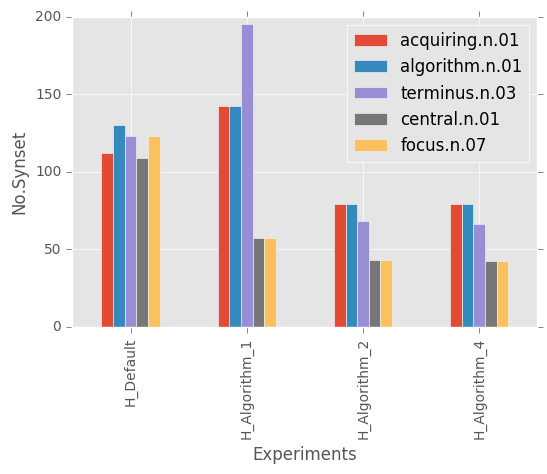

In [451]:
compin_H=H_df.plot(kind='bar', stacked=False)
compin_H.set_xlabel("Experiments")
compin_H.set_ylabel("No.Synset")
compin_H_fig = compin_H.get_figure()

compin_H_fig.savefig(path_database+Combining_H_fig, bbox_inches='tight', dpi=300)

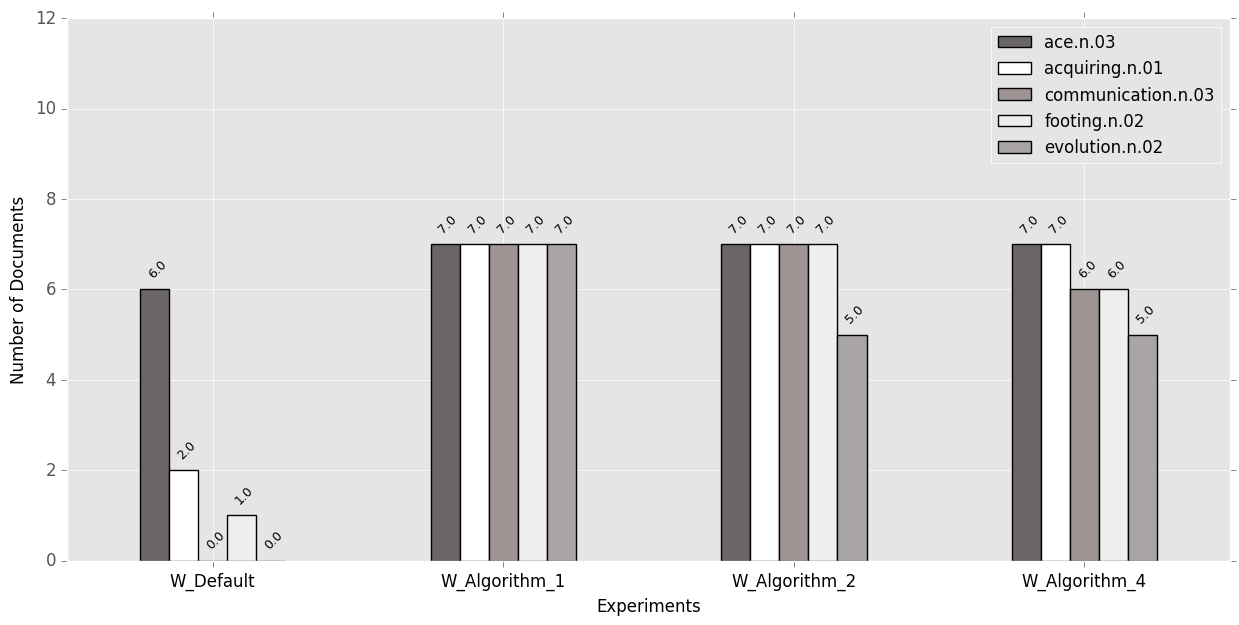

In [77]:
#http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# Load the dataset
data = pd.read_csv('/media/fsg/74C86089C8604C04/PHD/Softwares/ph/database/Combining_W_table.csv', index_col='Unnamed: 0',header=0)
ax = data.plot(kind='bar',figsize=(15,7),
                fontsize=12,edgecolor=['#000000'],color=['#6b6565','#ffffff','#9f9494','#eeeeee','#a9a5a5'],linewidth=1,linestyle='-');
ax.set_alpha(.8)
#ax.set_title("W_Expermints",fontsize=12,color='black')
ax.set_ylabel("Number of Documents", fontsize=12,color='black');
ax.set_yticks([0,2,4,6,8, 10,12])
ax.set_xlabel("Experiments", fontsize=12,color='black')
ax.set_xticklabels(data.index, rotation=0, fontsize=12,color='black')

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.02, i.get_height()+.5
            , \
            str(round((i.get_height()), 2)), fontsize=9, color='black',
                rotation=45)
axfig = ax.get_figure()
axfig.savefig('/media/fsg/74C86089C8604C04/PHD/Softwares/ph/database/Combining_W_table.png', bbox_inches='tight', dpi=300)

### Combining W

In [452]:
W_frames=[]
W_frames.append(df_W_lesk)
W_frames.append(df_W_res_lesk)
W_frames.append(df_W_thresholding_lesk)
W_frames.append(df_W_permutation_lesk)
W_df=compind_df(W_frames,path_database,dimentionalty_reduction_res_sem_sim_W_table).sort(['W_Algorithm_4','W_Algorithm_2'], ascending=[False,False]).groupby('W_Algorithm_4').head(2).T.ix[:,0:5]#T.ix[:,0:5]
W_df.to_csv(path_database+Combining_W_table)
W_df

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,ace.n.03,acquiring.n.01,communication.n.03,footing.n.02,evolution.n.02
W_Default,6,2,0,1,0
W_Algorithm_1,7,7,7,7,7
W_Algorithm_2,7,7,7,7,5
W_Algorithm_4,7,7,6,6,5


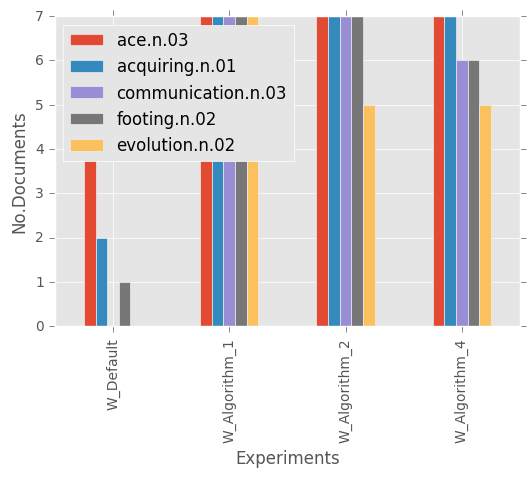

In [453]:
compin_W=W_df.plot(kind='bar', stacked=False)
compin_W.set_xlabel("Experiments")
compin_W.set_ylabel("No.Documents")
compin_W_fig = compin_W.get_figure()

compin_W_fig.savefig(path_database+Combining_W_fig, bbox_inches='tight', dpi=300)

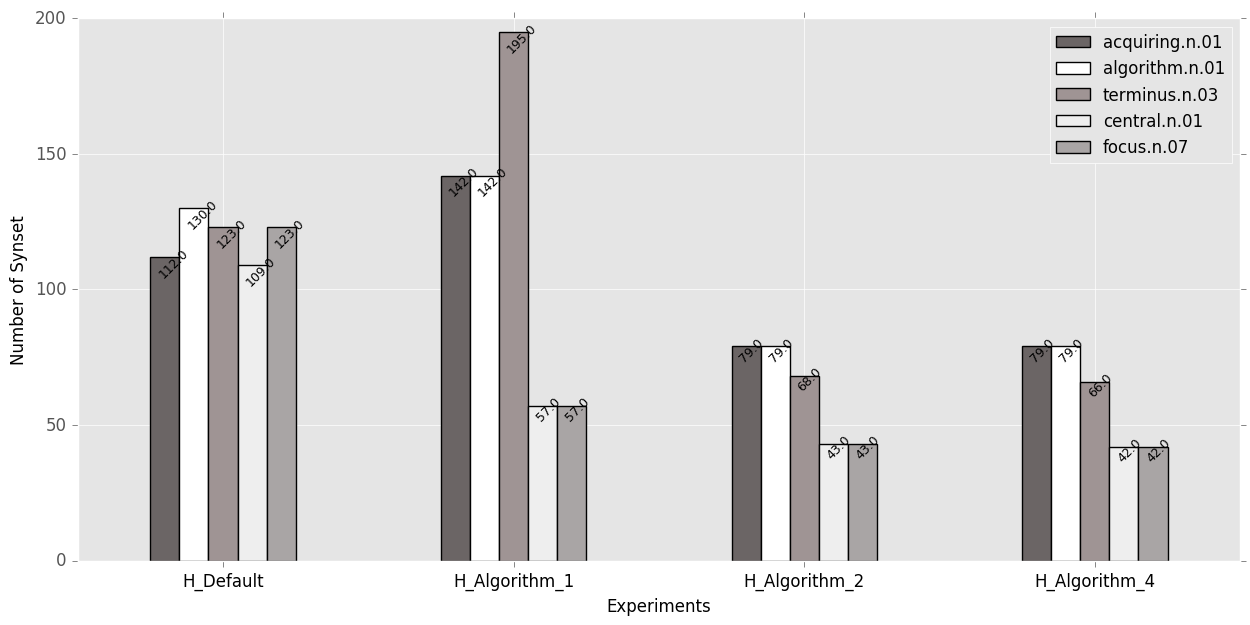

In [76]:
# Load the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
data = pd.read_csv('/media/fsg/74C86089C8604C04/PHD/Softwares/ph/database/Combining_H_table.csv', index_col='Unnamed: 0',header=0)
ax = data.plot(kind='bar',figsize=(15,7),
                fontsize=12,edgecolor=['#000000'],color=['#6b6565','#ffffff','#9f9494','#eeeeee','#a9a5a5'],linewidth=1,linestyle='-');
ax.set_alpha(.8)
#ax.set_title("W_Expermints",fontsize=12,color='black')
ax.set_ylabel("Number of Synset", fontsize=12,color='black');
ax.set_yticks([0,50,100,150,200])
ax.set_xlabel("Experiments", fontsize=12,color='black')
ax.set_xticklabels(data.index, rotation=0, fontsize=12,color='black')
handles, labels = ax.get_legend_handles_labels()


# set individual bar lables using above list
for i in ax.patches:
   
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.02, i.get_height()+.5
            , \
            str(round((i.get_height()), 2)), fontsize=9, color='black',
                rotation=45)
    
    
   

axfig = ax.get_figure()
axfig.savefig('/media/fsg/74C86089C8604C04/PHD/Softwares/ph/database/Combining_H_table.png', bbox_inches='tight', dpi=300)

## Topic Subset

In [454]:
def word_set_topic(topic_name,path_database,tablename):
    df=read_cvs_by_pands(path_database,tablename,index_col=0,header=0)
    df2=pd.DataFrame(df[df[topic_name]>0][topic_name],columns=[topic_name])
    #print('Shape is: ',df_T.shape)
    return df2#df[df[topic_name]!=0][topic_name]


In [455]:
df_res=word_set_topic('communication.n.03',path_database,res_sem_sim_table)
print('Word set of topic: communication.n.03','\nMatrix: RES','\nShape is: ',df_res.shape)
df_res

Word set of topic: communication.n.03 
Matrix: RES 
Shape is:  (142, 1)


,communication.n.03
acquiring.n.01,0.622355
algorithm.n.01,0.622355
beginning.n.05,0.622355
bind.n.01,0.622355
building.n.04,0.622355
business.n.04,0.622355
calculation.n.02,0.622355
capability.n.02,0.622355
care.n.04,0.622355
career.n.02,0.622355


In [456]:
df_T=word_set_topic('communication.n.03',path_database,res_sem_sim_threshold_correlation_coefficient_table)
print('Terms belong to topic: communication.n.03','\nAlgorithm 2','\nShape is: ',df_T.shape)
df_T


Terms belong to topic: communication.n.03 
Algorithm 2 
Shape is:  (9, 1)


,communication.n.03
communication.n.03,9.486038
footing.n.02,2.595083
formulation.n.01,2.595083
frankincense.n.01,2.595083
implication.n.04,2.595083
intensifier.n.01,2.595083
terminology.n.01,2.595083
tilt.n.04,2.595083
way.n.12,2.595083


In [457]:
df_p=word_set_topic('communication.n.03',path_database,res_sem_sim_permutaion_correlation_coefficient_table)
print('Terms belong to topic: communication.n.03','\nMatrix: Algorithm 4','\nShape is: ',df_p.shape)
df_p

Terms belong to topic: communication.n.03 
Matrix: Algorithm 4 
Shape is:  (7, 1)


,communication.n.03
communication.n.03,9.486038
footing.n.02,2.595083
implication.n.04,2.595083
intensifier.n.01,2.595083
terminology.n.01,2.595083
tilt.n.04,2.595083
way.n.12,2.595083


In [458]:
'''
To count word set of topic matrix
'''
compind_df(communicationFrame,path_database,'communicationFrame.csv').T
comdic={}
comdic['res']=df_res.T.size
comdic['Thresholding']=df_T.T.size
comdic['Permutation']=df_p.T.size

df_comdic=pd.DataFrame(comdic,index=['Word Count'])
df_comdic

NameError: name 'communicationFrame' is not defined

In [459]:
df_comdic.plot(kind='bar', stacked=False)

NameError: name 'df_comdic' is not defined

### Pragraph Topic

In [460]:
def paragraph_topic(topic_name,path_database,tablename):
    df=read_cvs_by_pands(path_database,tablename,index_col=0,header=0)
    df2=pd.DataFrame(df[df[topic_name]!=0][topic_name],columns=[topic_name])
    #print('Shape is: ',df_T.shape)
    return df2#df[df[topic_name]!=0][topic_name]


In [461]:
#df_nmf_W_tfidf_lesk_normal_table=read_cvs_by_pands(path_database,nmf_W_tfidf_lesk_normal_table,index_col=0,header=0)
#df_nmf_W_tfidf_lesk_normal_table.T.sort([0], ascending=[False]).groupby(0).head(2).T.ix[0:0,0:5]
                                
df_W_res=paragraph_topic('communication.n.03',path_database,nmf_W_res_sem_sim_correlation_coefficient_table)
print('Pragraphs belong to topic: communication.n.03','\nAlgorithm:1','\nShape is: ',df_W_res.shape)
df_W_res
    

Pragraphs belong to topic: communication.n.03 
Algorithm:1 
Shape is:  (7, 1)


,communication.n.03
0,2.9613
1,3.0877
2,3.9403
3,2.3986
4,3.1987
5,3.9073
6,3.2268


In [462]:
df_W_threshold=paragraph_topic('communication.n.03',path_database,nmf_W_res_sem_sim_threshold_correlation_coefficient_table)
print('Pragraphs belong to topic: communication.n.03','\nAlgorithm:2','\nShape is: ',df_W_res.shape)
df_W_threshold

Pragraphs belong to topic: communication.n.03 
Algorithm:2 
Shape is:  (7, 1)


,communication.n.03
0,0.3398
1,0.1703
2,1.6018
3,0.2951
4,1.5128
5,1.5191
6,0.7006


In [463]:
df_W_permutation=paragraph_topic('communication.n.03',path_database,nmf_W_res_sem_sim_permutaion_correlation_coefficient_table)
print('Pragraphs belong to topic: communication.n.03','\nAlgorithm:4','\nShape is: ',df_W_permutation.shape)
df_W_permutation

Pragraphs belong to topic: communication.n.03 
Algorithm:4 
Shape is:  (6, 1)


,communication.n.03
0,0.1988
2,1.4397
3,0.2951
4,1.5128
5,1.5191
6,0.3503


In [464]:
df_nmf_W_res_sem_sim_correlation_coefficient_table=read_cvs_by_pands(path_database,nmf_W_res_sem_sim_correlation_coefficient_table,index_col=0,header=0)
df_nmf_W_res_sem_sim_correlation_coefficient_table.T.sort([6], ascending=[False]).groupby(6).head(2).T.ix[0:0,0:5]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,modeling.n.02,discipline.n.02,technique.n.01,logic.n.05,methodology.n.02
0,9.9705,9.1094,8.8099,8.9236,8.9416


In [284]:
df_nmf_W_res_sem_sim_threshold_correlation_coefficient_table=read_cvs_by_pands(path_database,nmf_W_res_sem_sim_threshold_correlation_coefficient_table,index_col=0,header=0)
df_nmf_W_res_sem_sim_threshold_correlation_coefficient_table.T.sort([3], ascending=[False]).groupby(3).head(2).T.ix[0:0,0:5]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,modeling.n.02,computer_science.n.01,principle.n.04,methodology.n.02,mathematics.n.01
0,8.709,7.9359,6.6119,7.6801,8.2318


In [285]:
df_nmf_W_res_sem_sim_permutaion_correlation_coefficient_table=read_cvs_by_pands(path_database,nmf_W_res_sem_sim_permutaion_correlation_coefficient_table,index_col=0,header=0)
df_nmf_W_res_sem_sim_permutaion_correlation_coefficient_table.T.convert_objects(convert_numeric=True).sort_values(by=[0], ascending=[False]).groupby(0).head(5).T.ix[0:0,0:5]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,modeling.n.02,mathematics.n.01,electronics.n.01,science.n.01,computer_science.n.01
0,8.709,8.2318,8.0719,8.0719,7.9359


### TF-IDF Topic

In [294]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)[df_p.index]
df_tfidf.to_csv(path_database+TF_IDF_topic_table)
df_tfidf

,communication.n.03,footing.n.02,implication.n.04,intensifier.n.01,terminology.n.01,tilt.n.04,way.n.12
0,0.000000,0.000000,0.000000,0.076598,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.062454,0.088022,0.088022,0.000000,0.062454,0.088022,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.113707,0.000000,0.000000
4,0.159472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.103511,0.000000,0.000000,0.000000,0.207022,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.134968


#### Freq for topic

In [296]:
df_freq=read_cvs_by_pands(path_database,freq_lesk_table,index_col=0,header=0)[df_p.index]
df_freq.to_csv(path_database+Freq_topic_table)
df_freq

,communication.n.03,footing.n.02,implication.n.04,intensifier.n.01,terminology.n.01,tilt.n.04,way.n.12
paragraph1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
paragraph2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
paragraph3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
paragraph4,1.0,1.0,1.0,1.0,2.0,1.0,0.0
paragraph5,2.0,1.0,1.0,1.0,2.0,1.0,0.0
paragraph6,3.0,1.0,1.0,1.0,4.0,1.0,0.0
paragraph7,3.0,1.0,1.0,1.0,4.0,1.0,1.0


In [286]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_communication=pd.DataFrame(df_tfidf[df_tfidf['communication.n.03']!=0]['communication.n.03'],columns=['communication.n.03'])
print('Term(Word-Doc:TF-IDF: communication.n.03','\nMatrix: tfidf','\nShape is: ',df_tfidf_communication.shape)
df_tfidf_communication

Term(Word-Doc:TF-IDF: communication.n.03 
Matrix: tfidf 
Shape is:  (3, 1)


,communication.n.03
2,0.062454
4,0.159472
5,0.103511


In [195]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_footing=pd.DataFrame(df_tfidf[df_tfidf['footing.n.02']!=0]['footing.n.02'],columns=['footing.n.02'])
print('Term(Word-Doc:TF-IDF: footing.n.02','\nMatrix: tf-idf','\nShape is: ',df_tfidf_footing.shape)
df_tfidf_footing

Term(Word-Doc:TF-IDF: footing.n.02 
Matrix: tf-idf 
Shape is:  (1, 1)


,footing.n.02
2,0.088022


In [196]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_implication=pd.DataFrame(df_tfidf[df_tfidf['implication.n.04']!=0]['implication.n.04'],columns=['implication.n.04'])
print('Term(Word-Doc:TF-IDF: implication.n.04','\nMatrix: tf-idf','\nShape is: ',df_tfidf_implication.shape)
df_tfidf_implication

Term(Word-Doc:TF-IDF: implication.n.04 
Matrix: tf-idf 
Shape is:  (1, 1)


,implication.n.04
2,0.088022


In [197]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_intensifier=pd.DataFrame(df_tfidf[df_tfidf['intensifier.n.01']!=0]['intensifier.n.01'],columns=['intensifier.n.01'])
print('Term(Word-Doc:TF-IDF: intensifier.n.01','\nMatrix: tf-idf','\nShape is: ',df_tfidf_intensifier.shape)
df_tfidf_intensifier

Term(Word-Doc:TF-IDF: intensifier.n.01 
Matrix: tf-idf 
Shape is:  (1, 1)


,intensifier.n.01
0,0.076598


In [199]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_terminology=pd.DataFrame(df_tfidf[df_tfidf['terminology.n.01']!=0]['terminology.n.01'],columns=['terminology.n.01'])
print('Term(Word-Doc:TF-IDF: terminology.n.01','\nMatrix: tf-idf','\nShape is: ',df_tfidf_terminology.shape)
df_tfidf_terminology

Term(Word-Doc:TF-IDF: terminology.n.01 
Matrix: tf-idf 
Shape is:  (3, 1)


,terminology.n.01
2,0.062454
3,0.113707
5,0.207022


In [200]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_tilt=pd.DataFrame(df_tfidf[df_tfidf['tilt.n.04']!=0]['tilt.n.04'],columns=['tilt.n.04'])
print('Term(Word-Doc:TF-IDF: tilt.n.04','\nMatrix: tf-idf','\nShape is: ',df_tfidf_tilt.shape)
df_tfidf_tilt

Term(Word-Doc:TF-IDF: tilt.n.04 
Matrix: tf-idf 
Shape is:  (1, 1)


,tilt.n.04
2,0.088022


In [201]:
df_tfidf=read_cvs_by_pands(path_database,tf_idf_lesk_table,index_col=0,header=0)
df_tfidf_way=pd.DataFrame(df_tfidf[df_tfidf['way.n.12']!=0]['way.n.12'],columns=['way.n.12'])
print('Term(Word-Doc:TF-IDF: way.n.12','\nMatrix: tf-idf','\nShape is: ',df_tfidf_way.shape)
df_tfidf_way

Term(Word-Doc:TF-IDF: way.n.12 
Matrix: tf-idf 
Shape is:  (1, 1)


,way.n.12
6,0.134968


# Add pragraphs to Quee

In [ ]:
q = tf.FIFOQueue(capacity=10, dtypes=[tf.string], shapes=[()])
paragraphs_instance = tf.placeholder(tf.string)

enqueue_many = q.enqueue([paragraphs_instance])
#enqueue = q.enqueue([paragraphs_instance])
with tf.Session("grpc://localhost:2222") as sess:
    with tf.device("/job:worker/task:0/cpu:1"):
        #sess.run(tf.initialize_all_variables)
        paragraphs=read_text_from_database(path_database,paragraph_table)
        #rr=sess.run(read_text_from_database)
        print(paragraphs)
        sess.run(enqueue_many,feed_dict={paragraphs_instance: paragraphs})
        close_filename_queue = q.close()
    
    
print(paragraphs_instance)

In [ ]:
dequeue = q.dequeue()
with tf.Session("grpc://localhost:2222") as sess:
    with tf.device("/job:worker/task:1/cpu:1")
        print(sess.run(dequeue)) # [1., 2.]
        print(sess.run(dequeue)) # [3., 4.]
        print(sess.run(dequeue)) # [5., 6.]

In [ ]:
with tf.Session() as sess:
    #print(read_file(new_path))
    #print(txt_pragraphs(read_file(new_path))[0])
    #read_text_from_database()
    print(sess.run(queue_paragraph))
    

In [1]:
print(c)

NameError: name 'c' is not defined

In [2]:
from nltk.corpus import wordnet as wn
import networkx as nx

def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name)
            for s1 in fn(s):
                graph.add_node(s1.name)
                graph.add_edge(s.name, s1.name)
                recurse(s1)

    recurse(synset)
    return graph


In [6]:
dog = wn.synset('dog.n.01')

graph = closure_graph(dog,lambda s: s.hypernyms())
nx.draw_graphviz(graph)


AttributeError: module 'networkx.drawing' has no attribute 'graphviz_layout'

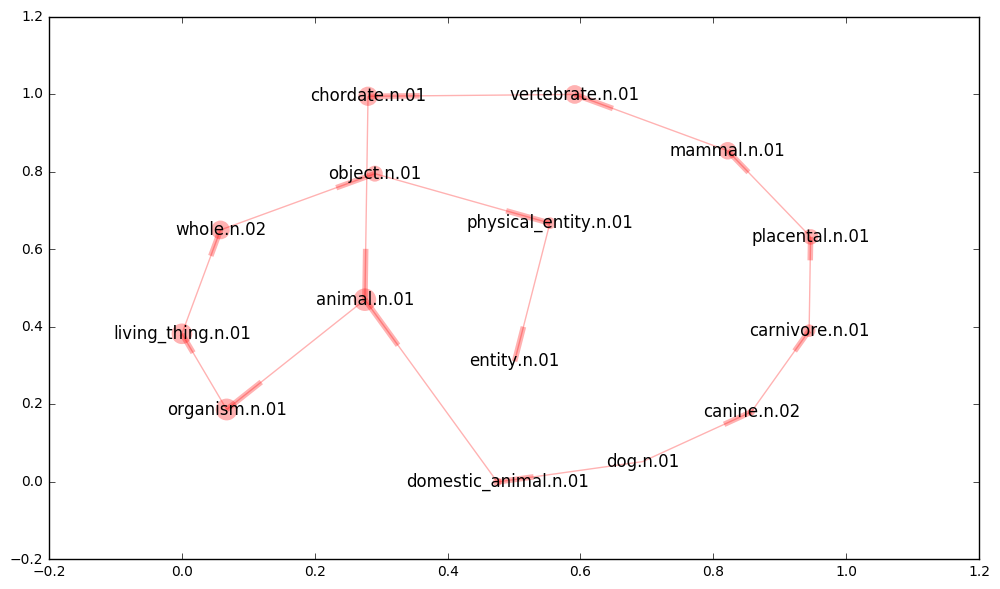

In [4]:
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
            for s1 in fn(s):
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)

    recurse(synset)
    return graph


dog = wn.synsets('dog')[0]
G = closure_graph(dog,
                      lambda s: s.hypernyms())
index = nx.betweenness_centrality(G)
plt.rc('figure', figsize=(12, 7))
node_size = [index[n]*1000 for n in G]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_size, edge_color='r', alpha=.3, linewidths=0)
plt.show()

